# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [3]:
A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [4]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [5]:
Ae1 = A@e_1
print('A multiplied by e1: ',Ae1)

Ae2 = A@e_2
print('A multiplied by e2: ',Ae2)

Ae3 = A@e_3
print('A multiplied by e3: ',Ae3)


A multiplied by e1:  [1 4 7]
A multiplied by e2:  [2 5 8]
A multiplied by e3:  [3 6 9]


1.  *A multiplied by e_1*  
The first column of A gets picked as the result vector since, we are multiplying it with e_1 vector which has 0 in the second and third column, which results in the second third column of A getting multiplied by 0. This is the basis of the "matrix row times columns vector" element by element.

2.  *A multiplied by e_2*  
The second column of A gets picked as the result vector since, we are multiplying it with e_2 vector which has 0 in the first and third column, which results in the first and third column of A getting multiplied by 0. This is the basis of the "matrix row times columns vector" element by element.

3.  *A multiplied by e_3*  
The third column of A gets picked as the result vector since, we are multiplying it with e_3 vector which has 0 in the first and second column, which results in the first second column of A getting multiplied by 0. This is the basis of the "matrix row times columns vector" element by element.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [6]:
u = np.ones(3)

In [7]:
Au = A@u
print('A multiplied by u: ',Au)

A multiplied by u:  [ 6. 15. 24.]


*A multiplied by u*

Multiplying a vector of one's by the A matrix results in a vector of shape (1,3), where each column represents the sum of each row of the matrix A. This is the basis of the "matrix row times columns vector" element by element.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [8]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [9]:
Ax = A@x
print('A multiplied by x: ',Ax)

A multiplied by x:  [-2  4 11]


*Multiplying A by x*

Whenever, you multiply a vector with an identity matrix , you get the vector itself. This is the basis of "matrix row times column", since 1 is on the diagnols it is picking up the vector elements row by row and turning the other digits to 0 during addition, leaving only the digit that belongs to that particular row.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [10]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

In [11]:
Ax = A@x
print('A multiplied by x: ',Ax)

A multiplied by x:  [11 -2  4]


*Multiplying A by x*

Multiplying A with x where 1 is not in  a diagonal, results in a similar vector as the original but the numbers in different positions. This is because matrix multiplication does row times column, and the column position of 1 in matrix A picks up the same position of row in our vector x. 

eg. 1 in row 1 is in column 3 --> result returns the row 3 digit i.e. 11
    1 in row 2 is in column 1 --> result returns the row 1 digit i.e. -2
    1 in row 3 is in column 2 --> result returns the row 2 digit i.e. 4

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [12]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [13]:
Ae1 = A@e_1
print('A multiplied by e1: ',Ae1)

Ae2 = A@e_2
print('A multiplied by e2: ',Ae2)

Ae3 = A@e_3
print('A multiplied by e3: ',Ae3)

A multiplied by e1:  [0.50052958 0.02574731 0.47372311]
A multiplied by e2:  [0.24049286 0.39251588 0.36699127]
A multiplied by e3:  [0.18358131 0.37907577 0.43734292]


1. *A multiplied by e1*
As we understood earlier, this matrix multiplication picks up the first column of the normalised transition matrix A. 
It explains the probability and transition from state 1 to each state.
We will start in state 1.
(approximated values)
- 50% probability that we stay in state 1
- 3% probability that we transition from state 1 --> state 2
- 47% probability that we transition from state 1 --> state 3

2. *A multiplied by e2*
As we understood earlier, this matrix multiplication picks up the second column of the normalised transition matrix A. 
It explains the probability and transition from state 2 to each state.
We will start in state 2
(approximated values)
- 24% probability that we transition to state 1
- 39% probability that we stay in state 2 
- 37% probability that we transition to state 3

3. *A multiplied by e3*
As we understood earlier, this matrix multiplication picks up the third column of the normalised transition matrix A. 
It explains the probability and transition from state 1 to each state.
We will start in state 3 
(approximated values)
- 18% probability that we transition to state 1
- 38% probability that we transition to state 2
- 44% probability that we transition state 3

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [14]:
Ae = [e_1,e_2,e_3] 
e = [e_1,e_2,e_3]
for i in range(0,3):
    for j in range(5):
        Ae[i] = A@Ae[i]

print('Ae1: ',Ae[0])
print('Ae2: ',Ae[1])
print('Ae3: ',Ae[2])

Ae1:  [0.29266551 0.27862515 0.42870935]
Ae2:  [0.29197422 0.27979983 0.42822595]
Ae3:  [0.29171646 0.2802254  0.42805814]


After multiplying each starting vector with A 5 times we can observe that our probabilities are almost the same for each state trnsition.They are converging into a stable distribution. If we keep multiplying the matrix A further, the distributions will further get stabilized.

i.e It is 29% for transition to state 1 no matter what state we start in
    It is 27% for transition to state 2 no matter what state we start in
    It is 43% for transition to state 3 no matter what state we start in

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [15]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])
x = np.array([1,0])
Tx = T@x
print('first_multiplication: ',Tx)

for i in range(15):
    Tx = T@Tx
    print(f'Tx{i} : ',Tx)


first_multiplication:  [0.25 0.75]
Tx0 :  [0.4375 0.5625]
Tx1 :  [0.390625 0.609375]
Tx2 :  [0.40234375 0.59765625]
Tx3 :  [0.39941406 0.60058594]
Tx4 :  [0.40014648 0.59985352]
Tx5 :  [0.39996338 0.60003662]
Tx6 :  [0.40000916 0.59999084]
Tx7 :  [0.39999771 0.60000229]
Tx8 :  [0.40000057 0.59999943]
Tx9 :  [0.39999986 0.60000014]
Tx10 :  [0.40000004 0.59999996]
Tx11 :  [0.39999999 0.60000001]
Tx12 :  [0.4 0.6]
Tx13 :  [0.4 0.6]
Tx14 :  [0.4 0.6]


Multiplying T by [1,0] results on column 1 of T being picked. That is 100% probability we start in state 1.
As we keep multiplying it with the initial condition, we get a different result than out first column. 
i.e. 44% probability we stay in state 1
     56% probability we transition to state 2

As we keep multiplying the initial condition with our new transition matrix, we start converging and moving towards a stable distribution.
By the 13th iteration the transition matrix has stabilised, and the further multiplicatons have the same result.
i.e. 40% we stay in state 1
     60% we transition to state 2

Thiss process is called forecasting, we get a guess of the next state with the help of this method.

In [16]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])
x = np.array([0,1])
Tx = T@x
print('first_multiplication: ',Tx)

for i in range(15):
    Tx = T@Tx
    print(f'Tx{i} : ',Tx)

first_multiplication:  [0.5 0.5]
Tx0 :  [0.375 0.625]
Tx1 :  [0.40625 0.59375]
Tx2 :  [0.3984375 0.6015625]
Tx3 :  [0.40039062 0.59960938]
Tx4 :  [0.39990234 0.60009766]
Tx5 :  [0.40002441 0.59997559]
Tx6 :  [0.3999939 0.6000061]
Tx7 :  [0.40000153 0.59999847]
Tx8 :  [0.39999962 0.60000038]
Tx9 :  [0.4000001 0.5999999]
Tx10 :  [0.39999998 0.60000002]
Tx11 :  [0.40000001 0.59999999]
Tx12 :  [0.4 0.6]
Tx13 :  [0.4 0.6]
Tx14 :  [0.4 0.6]


3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [17]:
os.chdir(r'C:\Users\karina mehta\UVA class\UnderstandingUncertainity')

cville_weather = pd.read_csv('cville_weather.csv')
# cville_weather.head()
cville_weather.isna().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

#### Missing Values
Looking at the missing values:

STATION, NAME, and DATE have no missing values.

Some variables have substantial missing data, including DAPR (399), MDPR (399), SNOW (188), and SNWD (410).

For our main variable of interest, PRCP, there are only 12 missing values, with the corresponding PRCP_ATTRIBUTES also missing in the same rows.

Since our focus is on precipitation and rain, and the number of missing PRCP values is small,although we could face some issues because a Markov chain assumes consecutive observations. However, for this exercise, we will continue working with the data we have.

In [18]:
# Two-state Markov chain
# 0 --> no rain, 1 --> rain
cville_weather['rain'] = (cville_weather['PRCP'] > 0).astype(int)

# Sort by date to ensure consecutive order of observations
subset_df = cville_weather[['DATE', 'rain']].sort_values('DATE')
subset_df

# Shift the 'rain' column down by 1 to create 'rain_yesterday'
# This represents yesterday's weather for each row
# We'll use this to calculate the probability of rain today given yesterday's state
cville_weather['rain_yesterday'] = cville_weather['rain'].shift(1)

# Drop rows where 'rain_yesterday' is NaN (the first day has no yesterday)
transitions = cville_weather.dropna(subset=['rain_yesterday'])

# Create the 2-state transition matrix
# Rows = today's weather, Columns = yesterday's weather
# normalize='columns' ensures probabilities sum to 1 for each yesterday's state
transition_matrix = pd.crosstab(transitions['rain'], transitions['rain_yesterday'], normalize='columns')
transition_matrix



rain_yesterday,0.0,1.0
rain,,
0,0.731602,0.351955
1,0.268398,0.648045


#### Interpretation

This is our 2 state transition matrix. It shows the following:
1. **Starting from clear yesterday (column 0)**  
    - P(clear today | clear yesterday) - There is a 73% chance that today will also be clear.
    - P(rain today | clear yesterday) - There is a 27% chance that it will rain today.

2. **Starting from rain yesterday (column 1)**
    - P(clear today | rain yesterday) - There is a 35% chance that today will be clear.
    - P(rain today | rain yesterday) - There is a 65% chance that it will rain again today.

In [19]:
#Using clear day as our initial condition
x = np.array([1,0])
P = transition_matrix.values
#Using the transition matrix to forecast the distribution
forecast = []
for i in range(25):
    x = P @ x
    forecast.append(x)

forecast = np.array(forecast)
diffs = np.abs(forecast[1:] - forecast[:-1])
max_diff = diffs.max(axis=1)

threshold = 0.0001
convergence = np.argmax(max_diff < threshold) + 1  

print("Convergence occurs around iteration:", convergence)

print('First multiplication: ',forecast[0])
print('Stabilized: ', forecast[-1])


Convergence occurs around iteration: 9
First multiplication:  [0.73160173 0.26839827]
Stabilized:  [0.5673463 0.4326537]


In [20]:
#Using rainy day as our initial condition
x = np.array([0,1])
P = transition_matrix.values
#Using the transition matrix to forecast the distribution
forecast = []
for i in range(25):
    x = P @ x
    forecast.append(x)

forecast = np.array(forecast)
diffs = np.abs(forecast[1:] - forecast[:-1])
max_diff = diffs.max(axis=1)

threshold = 0.0001
convergence = np.argmax(max_diff < threshold) + 1  

print("Convergence occurs around iteration:", convergence)

print('First multiplication: ',forecast[0])
print('Stabilized: ', forecast[-1])


Convergence occurs around iteration: 9
First multiplication:  [0.35195531 0.64804469]
Stabilized:  [0.5673463 0.4326537]


#### Interpretation

After repeatedly applying the transition matrix, the distribution stabilizes. This shows how the probabilities gradually converge to the long-term (stationary) distribution, providing our forecasted likelihood of rain or clear weather.

- **Starting from a clear day:**  
    - The distribution begins to converge around 9 iterations.  
    - Probability of remaining clear: 57%  
    - Probability of rain: 43%  

- **Starting from a rainy day:**  
    - The distribution also begins to converge around 9 iterations.  
    - Probability of rain: 43%  
    - Probability of being clear: 57%


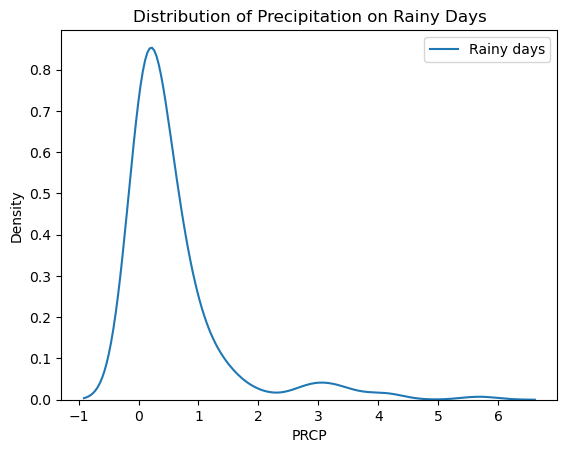

In [21]:
rainy_days = cville_weather[cville_weather['rain'] == 1]
sns.kdeplot(rainy_days['PRCP'], label='Rainy days')

plt.legend()
plt.title("Distribution of Precipitation on Rainy Days")
plt.xlabel("PRCP")
plt.ylabel("Density")
plt.show()

#### Model Accuracy

One way to improve the accuracy of our model is by incorporating information from more previous days instead of relying on just yesterday. This creates a higher-order Markov chain, which can capture multi-day weather patterns that a simple 1-step chain might miss. We could also consider more than two weather states such as light rain, heavy rain, snow or clear rather than just rainy vs. clear, to make the model more detailed. However, both approaches increase computational complexity and require sufficient consecutive data to estimate probabilities reliably. Additionally, the dataset contains some missing values that need to be addressed either by dropping them or imputing estimates. Since a Markov chain depends on consecutive observations, missing data can reduce forecast accuracy, so handling gaps carefully can make predictions more reliable.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [12]:
# Load the .pkl file
os.chdir(r'C:\Users\karina mehta\UVA class\UnderstandingUncertainity')
with open('taxicab.pkl', 'rb') as file:
    data = pickle.load(file)

# Convert to DataFrame
data = [series.reset_index(drop=True) for series in data]
taxi_df = pd.concat(data, axis=1, ignore_index=True)
taxi_df.columns = [f'series_{i}' for i in range(len(data))]
print(taxi_df.head(5))

            series_0      series_1           series_2           series_3  \
0  Outside Manhattan       Midtown            Chelsea  Greenwich Village   
1  Outside Manhattan      Kips Bay    Upper East Side        East Harlem   
2  Outside Manhattan      Kips Bay    Upper East Side            Midtown   
3  Outside Manhattan  East Village  Outside Manhattan  Outside Manhattan   
4  Outside Manhattan  East Village  Outside Manhattan  Outside Manhattan   

            series_4           series_5         series_6         series_7  \
0  Battery Park City            Midtown  Upper East Side  Upper West Side   
1       East Village            Midtown  Upper East Side  Upper East Side   
2       East Village            Midtown  Upper East Side  Upper East Side   
3           Gramercy  Flatiron District  Upper East Side          Midtown   
4           Gramercy       East Village          Midtown          Midtown   

            series_8           series_9  ... series_990       series_991  \
0  O

Within this dataset each neighborhoods is a state. It reflets the taxi trajectory/route from one neighborhood to another. There could be some None values since some routes may be longer than others. The columns are large in quantity since they represent each neighborhoods visited in the route i.e. Each value under different series is the transiiton space from one neighborhood to the other. Each row represents different trips. Current state would be the neighborhood the taxi is at while next state would be the neighborhood the taxi goes to next.

Further, this is an N-state markov chain, where N represents the number of neighborhoods.

In [14]:
#Determining state space and cleaning data
#Identifying each unique neighborhood for our state space and removing null values
neighborhood = set()

#Cleaning the dataset
#We are restricting our markov chain analysis to neighborhoods within manhattan (Excluding outside manhattan neighborhoods)
taxi_df = taxi_df.replace(['outside manhattan', 'liberty island', 'ellis island', 
                           'governors island'], np.nan)


taxi_df = taxi_df.dropna(how='all')

taxi_df = taxi_df.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)

#Creating state list
neighborhood = set()
for col in taxi_df.columns:
    neighborhood.update(x for x in taxi_df[col] if pd.notna(x))
    # neighborhood.update(taxi_df[col].dropna())

states = sorted(list(neighborhood))
num_states = len(states)

print('State sequence: /n',states)
print('No. of total states: /n',num_states)

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_26664\688933614.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  taxi_df = taxi_df.replace(['outside manhattan', 'liberty island', 'ellis island',
C:\Users\karina mehta\AppData\Local\Temp\ipykernel_26664\688933614.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  taxi_df = taxi_df.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)


State sequence: /n ['battery park city', 'central park', 'chelsea', 'chinatown', 'civic center', 'east harlem', 'east village', 'financial district', 'flatiron district', 'gramercy', 'greenwich village', 'harlem', "hell's kitchen", 'inwood', 'kips bay', 'little italy', 'lower east side', 'marble hill', 'midtown', 'morningside heights', 'murray hill', 'noho', 'nolita', "randall's island", 'roosevelt island', 'soho', 'stuyvesant town', 'theater district', 'tribeca', 'two bridges', 'upper east side', 'upper west side', 'washington heights', 'west village']
No. of total states: /n 34


In [15]:
#Transition matrix 
# The row represents the current neighborhood.
# The column represents the next neighborhood.

#Transition count i.e no. of transitions for each row
# Convert DataFrame to numpy array
arr = taxi_df.to_numpy()


# Create an index 
state_to_idx = {state: i for i, state in enumerate(states)}
counts = np.zeros((len(states), len(states)))
# Loop through rows (fast version)
for row in arr:
    seq = [state_to_idx[s] for s in row if s in state_to_idx]
    for i in range(len(seq)-1):
        counts[seq[i], seq[i+1]] += 1



In [16]:
counts_df = pd.DataFrame(counts, index=states, columns=states)
counts_df

#Normalizing the transition matrix
row_sums = counts_df.sum(axis=1)
transition_matrix = counts_df.div(row_sums, axis=0)

In [17]:
transition_matrix.head(5)

,battery park city,central park,chelsea,chinatown,civic center,east harlem,east village,financial district,flatiron district,gramercy,...,roosevelt island,soho,stuyvesant town,theater district,tribeca,two bridges,upper east side,upper west side,washington heights,west village
battery park city,0.010755,0.017513,0.096725,0.005342,0.003003,0.015603,0.043582,0.021780,0.019406,0.024648,...,0.000398,0.026602,0.005605,0.042537,0.019520,0.000455,0.136150,0.087680,0.003436,0.039940
central park,0.011450,0.018577,0.096562,0.004889,0.002752,0.015452,0.043408,0.020957,0.018763,0.024245,...,0.000371,0.026726,0.005390,0.042475,0.019661,0.000444,0.136088,0.086849,0.003515,0.040643
chelsea,0.011192,0.018015,0.095894,0.005165,0.002844,0.015284,0.043273,0.021397,0.019079,0.024292,...,0.000382,0.026610,0.005401,0.042368,0.019784,0.000511,0.136126,0.087246,0.003565,0.040713
chinatown,0.010815,0.018622,0.096562,0.005081,0.002791,0.014903,0.044028,0.021167,0.019464,0.024271,...,0.000350,0.027545,0.005176,0.041577,0.019502,0.000643,0.135339,0.086892,0.003340,0.041870
civic center,0.011080,0.017735,0.098614,0.004892,0.002541,0.015159,0.044562,0.022246,0.019187,0.024010,...,0.000432,0.026274,0.005635,0.042505,0.019688,0.000605,0.136089,0.086462,0.003474,0.039601


In [18]:

transition_matrix.loc['chelsea','midtown']


np.float64(0.18686168130491876)

Our transition matrix represents the probability of moving from one neighborhood (state) to another. Each column (or row, depending on how it’s constructed) is normalized so that the probabilities sum to 1.
For example, as shown above, the probability of a taxi going from Chelsea (the current state) to Midtown (the next state) is 0.19, or 19%.

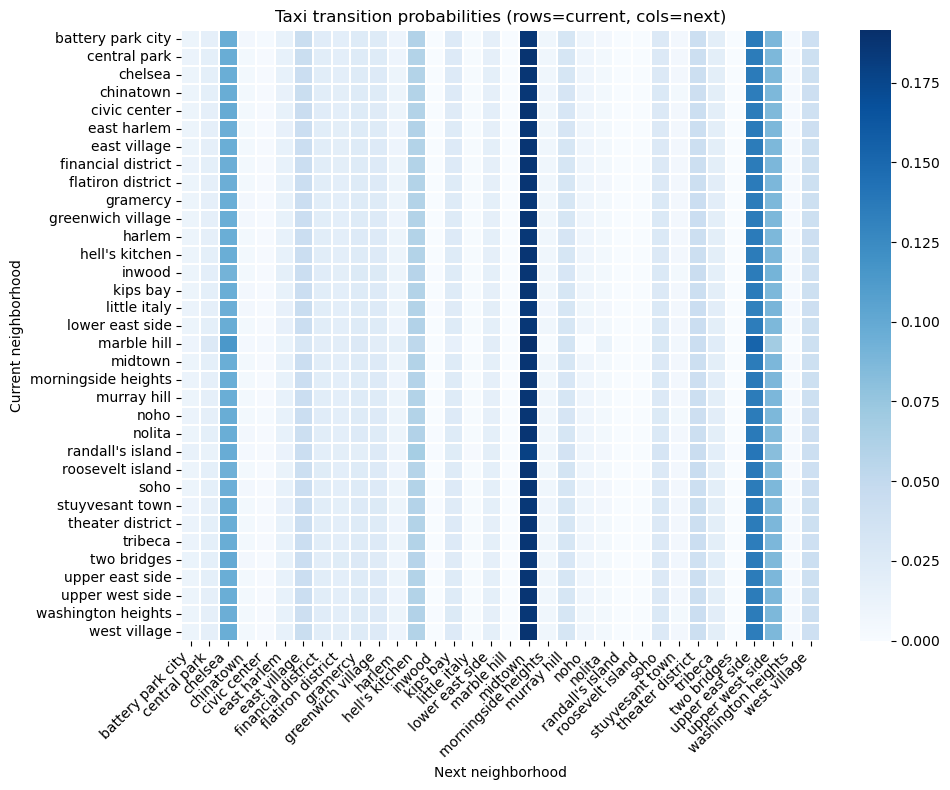

In [23]:
#Heatmap to identify most common routes

plt.figure(figsize=(10,8))
sns.heatmap(transition_matrix, cmap="Blues", linewidths=0.3, xticklabels=True, yticklabels=True)
plt.xlabel("Next neighborhood")
plt.ylabel("Current neighborhood")
plt.title("Taxi transition probabilities (rows=current, cols=next)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The bulk of the probability is concentrated in a few columns (Next Neighborhoods) that serve as major drop-off points like Midtown, Upper East Side, Central Park etc. These high values dominate the color scale, causing the smaller probabilities to appear lighter than they actually are. 

In [20]:
transition_matrix.loc["battery park city"].sort_values(ascending=False).head()

midtown            0.185590
upper east side    0.136150
chelsea            0.096725
upper west side    0.087680
hell's kitchen     0.060116
Name: battery park city, dtype: float64

**Identifying the most common routes**

Assuming the definition of *most common route* as *the highest probability transition in our transition matrix*, we can capture these routes by identifying the darkest colors on our heatmap.

Top 5 most common routes:
1. battery park city --> midtown
2. central park --> midtown
3. chelsea --> midtown
4. chinatown --> midtown
5. civic center --> midtown

We can see the trend that the most common location travelled for these transition probabilities is to midtown.



In [24]:
# column with max value per row
most_likely_next = transition_matrix.idxmax(axis=1)  
# corresponding probabilities
highest_probs = transition_matrix.max(axis=1)        

# Combine into a DataFrame
most_common_transitions = pd.DataFrame({
    'current': transition_matrix.index,
    'next': most_likely_next.values,
    'probability': highest_probs.values
})

most_common_transitions.head(10)


,current,next,probability
0,battery park city,midtown,0.185590
1,central park,midtown,0.188376
2,chelsea,midtown,0.186862
3,chinatown,midtown,0.186198
4,civic center,midtown,0.187824
5,east harlem,midtown,0.185559
6,east village,midtown,0.187031
7,financial district,midtown,0.186965
8,flatiron district,midtown,0.187507
9,gramercy,midtown,0.186084


We have built a first-order Markov chain i.e. The next state depends only on the current state.

We are carrying out our simulation and forecasting on the basis of where the Taxi is currently and then we check the probability of the next state. Since this problem includes looking at the taxi trajectory, it makes sense to go through it in a first-order markov chain process, since, looking at the previous state spaces is not going to help us identify/forecast the next state.

**Hell's Kitchen Forecasting**


In [30]:
start = np.zeros(len(states))

if "hell's kitchen" in states:
    start[states.index("hell's kitchen")] = 1.0
else:
    # fallback: pick first state
    start[0] = 1.0

P = transition_matrix.values  # numpy array
p = start.copy()


def step_forward(p, P, steps=1):
    for i in range(steps):
        p = p @ P #Markov chain multiplication
    return p

for steps in [2,3,5,10]:
    forecast = step_forward(start, P, steps=steps)
    top3_idx = np.argsort(forecast)[-3:][::-1]
    print(f"\nAfter {steps} trips, top 3:")
    for idx in top3_idx:
        print(f"  {states[idx]}: {round(forecast[idx], 3)}")
        



After 2 trips, top 3:
  midtown: 0.187
  upper east side: 0.136
  chelsea: 0.096

After 3 trips, top 3:
  midtown: 0.187
  upper east side: 0.136
  chelsea: 0.096

After 5 trips, top 3:
  midtown: 0.187
  upper east side: 0.136
  chelsea: 0.096

After 10 trips, top 3:
  midtown: 0.187
  upper east side: 0.136
  chelsea: 0.096


In [31]:
p = np.ones(len(states)) / len(states)  # start uniform
for i in range(500):
    p_next = p @ P
    if np.max(np.abs(p_next - p)) < 1e-8:
        print("Converged at iteration", i+1)
        break
    p = p_next

# Show top 10 neighborhoods where cabs spend time
top_idx = np.argsort(p)[-10:][::-1]
for idx in top_idx:
    print(states[idx], round(p[idx], 3))


Converged at iteration 4
midtown 0.187
upper east side 0.136
chelsea 0.096
upper west side 0.088
hell's kitchen 0.059
east village 0.043
theater district 0.042
west village 0.041
murray hill 0.032
soho 0.027
